# Toxic Release Inventory (TRI) Data

Greg Lee
<br> 03.03.2020

**WHAT IS THE TRI** 
TRI tracks the management of certain toxic chemicals that may pose a threat to human health and the environment. U.S. facilities in different industry sectors must report annually how much of each chemical is released to the environment and/or managed through recycling, energy recovery and treatment. (A "release" of a chemical means that it is emitted to the air or water, or placed in some type of land disposal.) [1]

**WHICH CHEMICALS ARE TRACKED?**
In general, chemicals covered by the TRI Program are those that cause:

1. Cancer or other chronic human health effects
2. Significant adverse acute human health effects
3. Significant adverse environmental effects

There are currently 755 individually listed chemicals and 33 chemical categories covered by the TRI Program. Facilities that manufacture, process or otherwise use these chemicals in amounts above established levels must submit annual reporting forms for each chemical. Note that the TRI chemical list doesn't include all toxic chemicals used in the U.S.

**WHICH COMPANIES HAVE TO REPORT?** 
Not all companies are required to report chemical usage and disposal. The listed codes below showcase buisness that are required to do TRI reporting. 

1. 212 Mining
2. 221 Utilities
3. 31 - 33 Manufacturing
4. All Other Miscellaneous Manufacturing (includes 1119, 1133, 2111, 4883, 5417, 8114)
5. 424 Merchant Wholesalers, Non-durable Goods
6. 425 Wholesale Electronic Markets and Agents Brokers
7. 511, 512, 519 Publishing
8. 562 Hazardous Waste
9. Federal Facilities
[2]

**WHEN WAS THE PROGRAM STARTED**
In 1986, Congress passed the Emergency Planning and Community Right-to-Know Act (EPCRA) to support and promote emergency planning and to provide the public with information about releases of toxic chemicals in their community. Section 313 of EPCRA established the Toxics Release Inventory. Data is collected on a yearly basis. 

[1] - https://www.epa.gov/toxics-release-inventory-tri-program/what-toxics-release-inventory
[2] - https://www.epa.gov/toxics-release-inventory-tri-program/tri-covered-industry-sectors 

## Library Imports

In [67]:
#USE geo env!

#Basic py: 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import os

#Vis
import seaborn as sns

#Geo
import geopandas as gpd
import fiona
from shapely.geometry import Point
import descartes
import contextily as ctx #Basemaps 


## Data Import

In [4]:
#Import all data and merge into one dataframe
path = "./Toxic_Release_Inventory" 
for index, files in enumerate(os.listdir(path)):
    temp_df = pd.read_csv(path + "/" + files)

    #Columns are standard, merge the dataset on that
    if index == 0:
        tri_df = temp_df
        print('check')
    else:
        tri_df = tri_df.append(temp_df)

check


## Data Cleaning

In [5]:
#Column Naming is Disorganized. Let's clean it up. 
tri_df.rename(columns=lambda x: ' '.join(x.split('.')[1:]), inplace=True)
tri_df.rename(columns=lambda x: x.replace(' ',''), inplace=True)
tri_df.head()

YEAR            TRIFD         FRSID  \
0  1995  84054MCRXX333SR  110008177187   
1  1995  84107SMPSN120WF  110000770130   
2  1995  84127THTCH1905F  110000469671   
3  1995  84116LKTHX594NB  110000469500   
4  1995  84119SLTLK2036W  110020076647   

                                FACILITYNAME            STREETADDRESS  \
0                     AMCOR MASONRY PRODUCTS      333 S. REDWOOD ROAD   
1  SIMPSON STEEL FABRICATORS &, ERECTORS INC       120 W FIRECLAY AVE   
2                                THATCHER CO          1905 FORTUNE RD   
3                               VIKTRON UTAH  594 N BILLY MITCHELL RD   
4                         SALT LAKE CIRCUITS            2036 W 2300 S   

              CITY     COUNTY  ST    ZIP  BIA  ... 85-RECYCLINGOFFSIT  \
0  NORTH SALT LAKE      DAVIS  UT  84054  NaN  ...                0.0   
1           MURRAY  SALT LAKE  UT  84107  NaN  ...                0.0   
2   SALT LAKE CITY  SALT LAKE  UT  84104  NaN  ...                0.0   
3   SALT LAKE CITY  SALT LAKE  UT  84116  NaN  ...                0.0   
4   SALT LAKE CITY  SALT LAKE  UT  84119  NaN  ...                0.0   

   86-TREATMENTONSITE  87-TREATMENTOFFSITE PRODUCTIONWSTE(81-87)  \
0                 0.0                  0.0                   0.0   
1                 0.0               3567.0                4281.0   
2                 0.0                279.0                 488.0   
3                 0.0               6723.0                7087.0   
4             12000.0                 12.0               12012.0   

   88-ONE-TIMERELEASE PROD_RATIO_OR_ACTIVITY 89-PRODUCTIONRATIO  \
0                 NaN                    NaN                NaN   
1                 0.0                    NaN               2.01   
2                 0.0                    NaN               1.03   
3                 0.0                    NaN               1.51   
4                 0.0                    NaN               3.00   

    PARENTCONAME  PARENTCODBNUM      
0  OLDCASTLE INC     37176591.0 NaN  
1            NaN            NaN NaN  
2    THATCHER CO     41307356.0 NaN  
3     VIKTRON LP    789166964.0 NaN  
4            NaN            NaN NaN  

[5 rows x 114 columns]

**What is the shape of the data?**

In [6]:
print("In total there are {0} data entries and {1} features".format(tri_df.shape[0],tri_df.shape[1]))

In total there are 23523 data entries and 114 features


**Select data from 1990-2000**

In [7]:
select_tri = tri_df.loc[(tri_df['YEAR']>=1990) & (tri_df["YEAR"] < 2000)]
print("From 1990-1999 there are {0} data entries and {1} features".format(select_tri.shape[0],select_tri.shape[1]))

From 1990-1999 there are 5733 data entries and 114 features


This data is as we expect. The 114 features represent details about the location, industry and toxin. For more information on this, please visit the EPAs website (https://www.epa.gov/toxics-release-inventory-tri-program/descriptions-tri-data-terms#popup_1)

In [8]:
#Do we have Nans in the data? 
pd.set_option('display.max_rows', 500)
print(select_tri.isna().sum().sort_values())

YEAR                          0
62-M26                        0
62-M24                        0
62-M20                        0
OFF-SITERELEASETOTAL          0
62-M99                        0
62-M94                        0
62-M90                        0
62-M79                        0
62-M73                        0
62-M65                        0
62-M64                        0
62-M67                        0
62-M66                        0
62-M63                        0
62-M72                        0
62-M82                        0
62-M81                        0
62-M71                        0
62-M61METAL                   0
62-M40METAL                   0
62-M62                        0
62-M41                        0
62-M10                        0
62-M28                        0
62-M93                        0
OFF-SITERECYCLEDTOTAL         0
62-M56                        0
PRODUCTIONWSTE(81-87)         0
87-TREATMENTOFFSITE           0
86-TREATMENTONSITE            0
85-RECYC

The data is fairly clean although several columns have empty values. These are the following variables with the total number of missing values (of 6524)

| Feature | Total Values Missing   |
|------|------|
|   SRSID   |2|
|PRIMARYSIC|3|
|89-PRODUCTIONRATIO|1479|
|PARENTCONAME|1657|
|88-ONE-TIMERELEASE|1677|
|PARENTCODBNUM|2392|
|SIC2|5458|
|SIC3|6066|
|SIC4|6471|
|TRIBE|6495|
|BIA|6495|
|SIC5|6507|
|SIC6|6508|
|PROD_RATIO_OR_ACTIVITY|6524|
|NAICS3|6524|
|NAICS4|6524|
|NAICS5|6524|
|NAICS6|6524|
|NAICS2|6524|

In [9]:
#Dropping all Columns which have all missing values!
select_tri = select_tri.drop(columns = ['','NAICS6','NAICS2','NAICS5','NAICS4','NAICS3','PROD_RATIO_OR_ACTIVITY'])

Overall there is very little sparsity in the data. <br> 
For now going to keep all the values for which there <100 NaNs

In [10]:
clean_index = select_tri.isna().sum()<100
select_tri_clean = select_tri.loc[:,clean_index.index[clean_index==True]]
select_tri_clean.head()

YEAR            TRIFD         FRSID  \
0  1995  84054MCRXX333SR  110008177187   
1  1995  84107SMPSN120WF  110000770130   
2  1995  84127THTCH1905F  110000469671   
3  1995  84116LKTHX594NB  110000469500   
4  1995  84119SLTLK2036W  110020076647   

                                FACILITYNAME            STREETADDRESS  \
0                     AMCOR MASONRY PRODUCTS      333 S. REDWOOD ROAD   
1  SIMPSON STEEL FABRICATORS &, ERECTORS INC       120 W FIRECLAY AVE   
2                                THATCHER CO          1905 FORTUNE RD   
3                               VIKTRON UTAH  594 N BILLY MITCHELL RD   
4                         SALT LAKE CIRCUITS            2036 W 2300 S   

              CITY     COUNTY  ST    ZIP   LATITUDE  ...  81B-ON-SITEOTHER  \
0  NORTH SALT LAKE      DAVIS  UT  84054  40.837650  ...               0.0   
1           MURRAY  SALT LAKE  UT  84107  40.677996  ...               0.0   
2   SALT LAKE CITY  SALT LAKE  UT  84104  40.742030  ...               0.0   
3   SALT LAKE CITY  SALT LAKE  UT  84116  40.782020  ...               0.0   
4   SALT LAKE CITY  SALT LAKE  UT  84119  40.721345  ...               0.0   

  81C-OFF-SITECONTAIN  81D-OFF-SITEOTHERR 82-ENERGYRECOVERON  \
0                 0.0                 0.0                0.0   
1                 0.0                 0.0                0.0   
2                 0.0                 0.0                0.0   
3                 0.0                 0.0                0.0   
4                 0.0                 0.0                0.0   

  83-ENERGYRECOVEROF  84-RECYCLINGONSITE  85-RECYCLINGOFFSIT  \
0                0.0                 0.0                 0.0   
1                0.0                 0.0                 0.0   
2                0.0                 0.0                 0.0   
3                0.0                 0.0                 0.0   
4                0.0                 0.0                 0.0   

  86-TREATMENTONSITE 87-TREATMENTOFFSITE  PRODUCTIONWSTE(81-87)  
0                0.0                 0.0                    0.0  
1                0.0              3567.0                 4281.0  
2                0.0               279.0                  488.0  
3                0.0              6723.0                 7087.0  
4            12000.0                12.0                12012.0  

[5 rows x 96 columns]

Undestanding Column Nomenclature:
1. Most features are easy to understand ie Lat/Long, Zipcode, CAS#, units of measure
2. Harder to understand the emissions as there are >30 categories. Total releases seems to be a sum of all released chemicals
3. On air:
    - 51-FUGITIVEAIR
        - Fugitive emissions are emissions of gases or vapors from pressurized equipment due to leaks and other unintended or irregular releases of gases, mostly from industrial activities. [4]
    - 52-STACKAIR
        - All releases of the EPCRA Section 313 Chemical to the air that occur through stacks, confined vvents, ducts, pipes or other confined air streams [4] 
    - TOTALRELEASES
        - Total released chemicals through all modalities!
    
[4] https://www.epa.gov/trinationalanalysis/air-releases#self 

In [54]:
#Let's collect and analyze a subset of the data which focuses on TRI air releases
select_tri_air = select_tri_clean[['YEAR','TRIFD','FACILITYNAME','CITY','COUNTY','ST','ZIP','LATITUDE','LONGITUDE',
                           'INDUSTRYSECTORCODE','INDUSTRYSECTOR','CHEMICAL','CAS#/COMPOUNDID','METAL','CARCINOGEN' ,
                           'UNITOFMEASURE','51-FUGITIVEAIR','52-STACKAIR','TOTALRELEASES']]
select_tri_air.head()

YEAR            TRIFD                               FACILITYNAME  \
0  1995  84054MCRXX333SR                     AMCOR MASONRY PRODUCTS   
1  1995  84107SMPSN120WF  SIMPSON STEEL FABRICATORS &, ERECTORS INC   
2  1995  84127THTCH1905F                                THATCHER CO   
3  1995  84116LKTHX594NB                               VIKTRON UTAH   
4  1995  84119SLTLK2036W                         SALT LAKE CIRCUITS   

              CITY     COUNTY  ST    ZIP   LATITUDE   LONGITUDE  \
0  NORTH SALT LAKE      DAVIS  UT  84054  40.837650 -111.934050   
1           MURRAY  SALT LAKE  UT  84107  40.677996 -111.894597   
2   SALT LAKE CITY  SALT LAKE  UT  84104  40.742030 -111.944550   
3   SALT LAKE CITY  SALT LAKE  UT  84116  40.782020 -112.013490   
4   SALT LAKE CITY  SALT LAKE  UT  84119  40.721345 -111.945450   

   INDUSTRYSECTORCODE                     INDUSTRYSECTOR  \
0                 327        Nonmetallic Mineral Product   
1                 332                  Fabricated Metals   
2                 325                          Chemicals   
3                 334  Computers and Electronic Products   
4                 334  Computers and Electronic Products   

                                            CHEMICAL CAS#/COMPOUNDID METAL  \
0                                            MIXTURE         MIXTURE    NO   
1                                           CHROMIUM       007440473   YES   
2                                           METHANOL       000067561    NO   
3                                       FORMALDEHYDE       000050000    NO   
4  HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...       007647010    NO   

  CARCINOGEN UNITOFMEASURE  51-FUGITIVEAIR  52-STACKAIR  TOTALRELEASES  
0         NO        Pounds             0.0          0.0            0.0  
1         NO        Pounds           750.0          0.0          750.0  
2         NO        Pounds             5.0        250.0          255.0  
3        YES        Pounds            68.0        296.0          364.0  
4         NO        Pounds             0.0          0.0            0.0

## Descriptive Statistics and Visualizations:

**Selecting data which has non-zero values for fugitive air or stack air and is a classified carcinogen (IARC)**

In [55]:
select_tri_air = select_tri_air[(select_tri_air['51-FUGITIVEAIR']>0) | (select_tri_air['52-STACKAIR']>0)]

In [56]:
#IARC Carc: 
iarc_df = pd.read_csv('IARC_Class_Full_List.csv')

#Standardize the Column Names
iarc_df.rename(columns=lambda x: x.replace(' ','_'), inplace=True)
iarc_df.rename(columns=lambda x: x.replace('.',''), inplace=True)

#The CAS numbers are not standardized between groups. Let's change that!
#A CASRN contains a first number (2-7 digits) - second number (2 digits) - third number - 1 digit=
iarc_df.CAS_No = iarc_df.CAS_No.str.replace('-','').apply('{:0>9}'.format)
iarc_df.CAS_No = iarc_df.CAS_No.str.replace('000000nan',str(np.nan))

print("There are {0} chemicals with {1} features".format(iarc_df.shape[0],iarc_df.shape[1]))

There are 1079 chemicals with 6 features


In [57]:
#Select those chemicals with a 1,2A or 2B designation (KNOWN CARCINOGENS)
known_carc = iarc_df[iarc_df.Group != "3"]

In [59]:
known_carc.head(3)

CAS_No  \
0                    000099978   
8                    000098953   
9  98873, 98077, 100447, 98884   

                                               Agent Group         Volume  \
0                           N,N-Dimethyl-p-toluidine    2B            115   
8                                       Nitrobenzene    2B             65   
9  alpha-Chlorinated toluenes (benzal chloride, b...    2A  29, Sup 7, 71   

   Year Additional_information  
0  2018                    NaN  
8  1996                    NaN  
9  1999                    NaN

In [60]:
carc_sel_tri_air = known_carc.merge(select_tri_air, left_on='CAS_No', right_on='CAS#/COMPOUNDID',how='inner')

In [61]:
print("Data are present from {0} to {1}".format(carc_sel_tri_air['YEAR'].min(),carc_sel_tri_air['YEAR'].max()))
print("There are {0} total observations in the data".format(carc_sel_tri_air.shape[0]))

Data are present from 1990 to 1999
There are 900 total observations in the data


**How many Unique locations are present within the data?**

In [62]:
uniq_locs = carc_sel_tri_air.groupby(['LATITUDE', 'LONGITUDE']).size().reset_index(name='Freq')
print("There are a total of {0} unique locations".format(uniq_locs.shape[0]))

There are a total of 113 unique locations


Text(0.5, 1.0, 'Histogram of TRI Occurences by County')

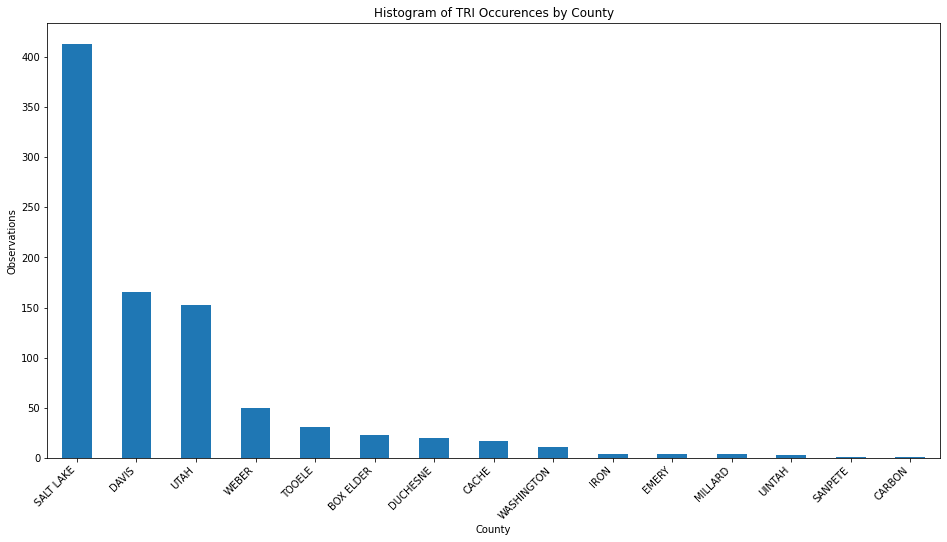

In [63]:
#Which Counties have the most observations? 
fig,ax = plt.subplots(1,1,figsize=(16, 8))
ax =  carc_sel_tri_air['COUNTY'].value_counts().plot.bar()
ax.set_xticklabels(carc_sel_tri_air['COUNTY'].value_counts().index, rotation = 45, ha="right")
ax.set_xlabel('County')
ax.set_ylabel('Observations')
ax.set_title('Histogram of TRI Occurences by County')

As expected Salt Lake City has the greatest number of TRI releases, perhaps due to the large population numbers. 

**Comparison: Which counties have the largest releases?**

In [64]:
#Unit Standardization: 
carc_sel_tri_air["UNITOFMEASURE"].value_counts()

Pounds    900
Name: UNITOFMEASURE, dtype: int64

In [65]:
#No conversions are necessary with this selection of data: all in pounds. This function is irrelevant!
def converter(measure,columns):
    if measure['UNITOFMEASURE'] == "Pounds":
        val = measure[columns]  
    else:
        val = measure[columns] * 0.00220462

    return val

In [80]:
carc_sel_tri_air['sum']=1
carc_sel_tri_air.groupby(['YEAR']).sum()['sum'].mean()

90.0

Text(0.5, 1.0, 'Yearly Average of Stack Released Chemicals')

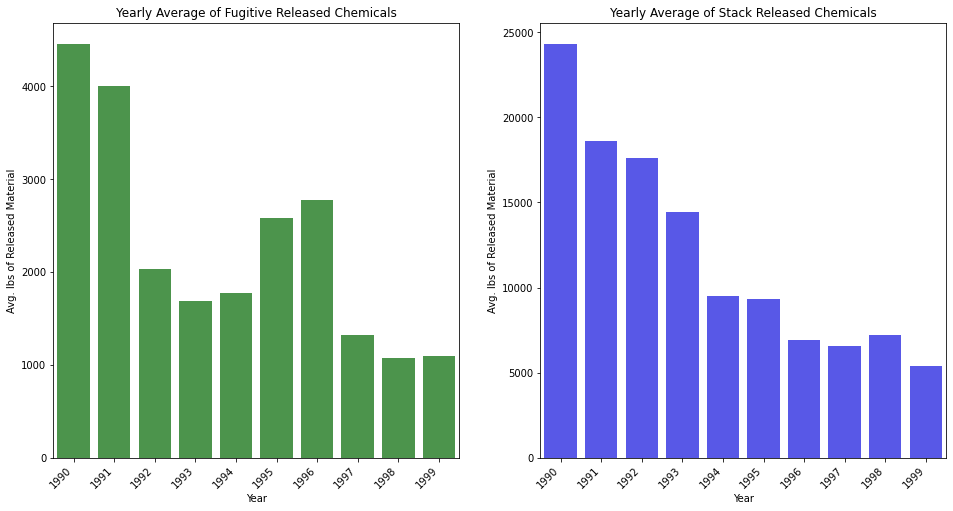

In [68]:
agg_avg_year =carc_sel_tri_air.groupby(['YEAR']).mean()

#Plotting
fig,ax = plt.subplots(1,2,figsize=(16, 8))
sns.barplot(x=agg_avg_year.index, y="51-FUGITIVEAIR", data=agg_avg_year, palette=['green'],alpha = 0.75,ax = ax[0])
ax[0].set_xticklabels(agg_avg_year.index, rotation = 45, ha="right")
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Avg. lbs of Released Material')
ax[0].set_title('Yearly Average of Fugitive Released Chemicals')

sns.barplot(x=agg_avg_year.index, y="52-STACKAIR", data=agg_avg_year, palette=['blue'],alpha = 0.75,ax = ax[1])
ax[1].set_xticklabels(agg_avg_year.index, rotation = 45, ha="right")
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Avg. lbs of Released Material')
ax[1].set_title('Yearly Average of Stack Released Chemicals')

So despite there being more observations in later years, there are significantly lower amounts of released chemicals. The EPA website attributes this to new processing and tatics to save energy.

In [69]:
#Let's look at how the average per county is changing:
agg_avg_year_count =carc_sel_tri_air.groupby(['YEAR','COUNTY']).mean()

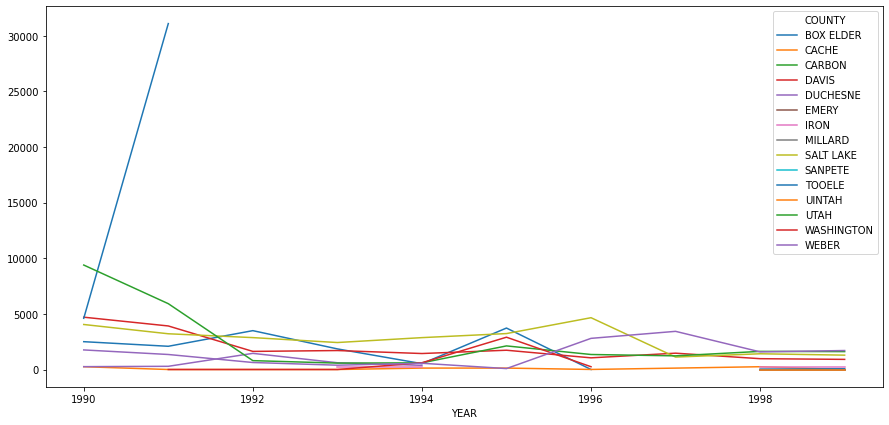

In [70]:
fig, ax = plt.subplots(figsize=(15,7))
agg_avg_year_count['51-FUGITIVEAIR'].unstack().plot(ax=ax)

There is no missing data within plot. Some counties do not always have any stack releases per each year. Thus there is sparsity in the line graphs

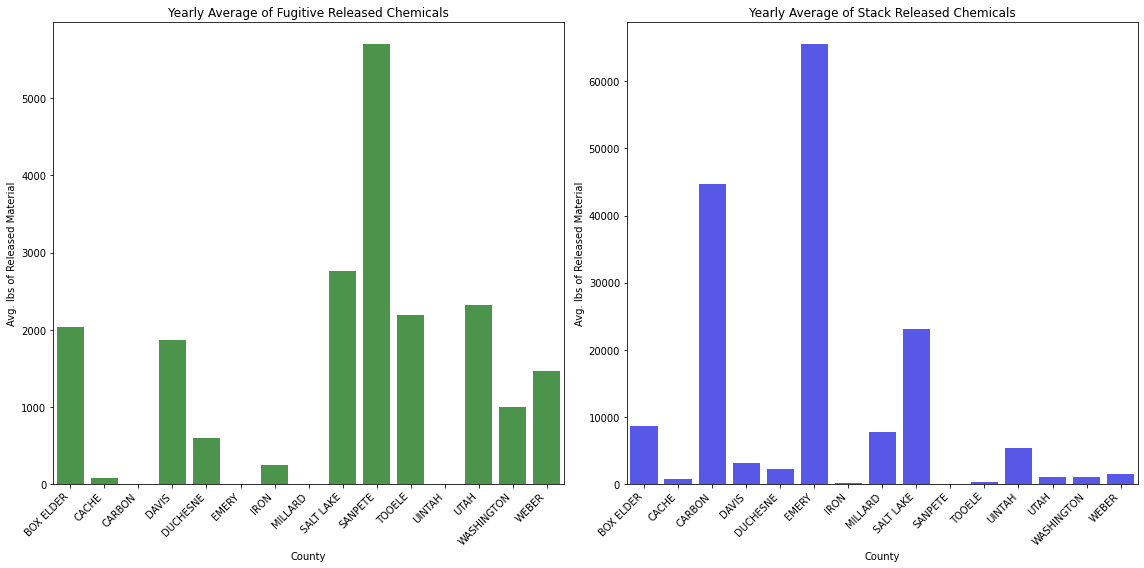

In [88]:
#Are there any counties that stand out? 
agg_average_county = carc_sel_tri_air.groupby(['COUNTY']).mean()

#Plotting
fig,ax = plt.subplots(1,2,figsize=(16, 8))
sns.barplot(x=agg_average_county.index, y="51-FUGITIVEAIR", data=agg_average_county, palette=['green'],alpha = 0.75,ax = ax[0])
ax[0].set_xticklabels(agg_average_county.index, rotation = 45, ha="right")
ax[0].set_xlabel('County')
ax[0].set_ylabel('Avg. lbs of Released Material')
ax[0].set_title('Yearly Average of Fugitive Released Chemicals')

sns.barplot(x=agg_average_county.index, y="52-STACKAIR", data=agg_average_county, palette=['blue'],alpha = 0.75,ax = ax[1])
ax[1].set_xticklabels(agg_average_county.index, rotation = 45, ha="right")
ax[1].set_xlabel('County')
ax[1].set_ylabel('Avg. lbs of Released Material')
ax[1].set_title('Yearly Average of Stack Released Chemicals')
plt.tight_layout()
plt.savefig('./yearly_average.png')

In [74]:
#How many unique chemicals are represented?
carc_sel_tri_air['CAS_No'].drop_duplicates().shape

(32,)

In [72]:
#What are the most common chemicals
agg_chems =carc_sel_tri_air['CHEMICAL'].value_counts()
print("Most common chemical spills")
agg_chems.head(5)

Most common chemical spills


SULFURIC ACID (1994 AND AFTER ACID AEROSOLS" ONLY)"    137
NICKEL                                                  97
STYRENE                                                 84
BENZENE                                                 82
ETHYLBENZENE                                            73
Name: CHEMICAL, dtype: int64

In [73]:
print("Least common chemical spills")
agg_chems.tail(5)

Least common chemical spills


PENTACHLOROPHENOL          2
DIETHANOLAMINE             2
CHLOROFORM                 2
N,N-DIMETHYLFORMAMIDE      1
4,4'-METHYLENEDIANILINE    1
Name: CHEMICAL, dtype: int64

## Let's Visualize Where the Spills occur based upon the year!

In [89]:
gdf = gpd.GeoDataFrame(
    carc_sel_tri_air, geometry=gpd.points_from_xy(carc_sel_tri_air.LONGITUDE, carc_sel_tri_air.LATITUDE))
gdf.crs = {'init' :'epsg:4326'}
gdf = gdf.to_crs({'init': 'epsg:3857'})


/home/boogie2/anaconda3/envs/lab_basic/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


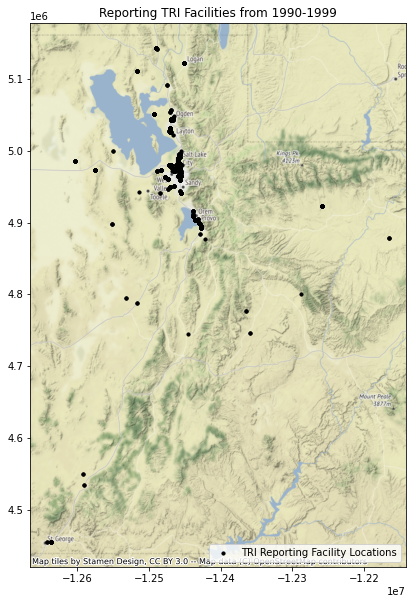

In [96]:
fig, ax = plt.subplots(figsize = (10,10)) 
gdf.plot(ax = ax,markersize=10, marker='o', color='black')
plt.title("Reporting TRI Facilities from 1990-1999")
plt.legend(['TRI Reporting Facility Locations'], loc='lower right')
ctx.add_basemap(ax)
plt.savefig('./TRI_facilities.png')
plt.show()


In [41]:
gdf[gdf['YEAR']==1990]

CAS_No                                              Agent Group  \
0    000098828                                             Cumene    2B   
1    000098828                                             Cumene    2B   
20   000091225                                          Quinoline    2B   
26   000091203                                        Naphthalene    2B   
27   000091203                                        Naphthalene    2B   
28   000091203                                        Naphthalene    2B   
29   000091203                                        Naphthalene    2B   
30   000091203                                        Naphthalene    2B   
31   000091203                                        Naphthalene    2B   
32   000091203                                        Naphthalene    2B   
33   000091203                                        Naphthalene    2B   
101  008001589                                          Creosotes    2A   
125  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
126  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
127  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
128  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
129  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
130  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
131  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
132  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
133  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
134  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
135  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
136  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
137  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
138  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
139  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
140  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
141  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
142  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
143  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
144  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
145  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
146  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
147  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
148  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
262  000075218                                     Ethylene oxide     1   
272  000075092               Dichloromethane (Methylene chloride)    2A   
273  000075092               Dichloromethane (Methylene chloride)    2A   
274  000075092               Dichloromethane (Methylene chloride)    2A   
275  000075092               Dichloromethane (Methylene chloride)    2A   
276  000075092               Dichloromethane (Methylene chloride)    2A   
326  007440439                      Cadmium and cadmium compounds     1   
333  007440020                        Nickel, metallic and alloys    2B   
334  007440020                        Nickel, metallic and alloys    2B   
335  007440020                        Nickel, metallic and alloys    2B   
336  007440020                        Nickel, metallic and alloys    2B   
337  007440020                        Nickel, metallic and alloys    2B   
430  007439921                                               Lead    2B   
431  007439921                                               Lead    2B   
464  000071432                                            Benzene     1   
465  000071432                                            Benzene     1   
466  000071432                   

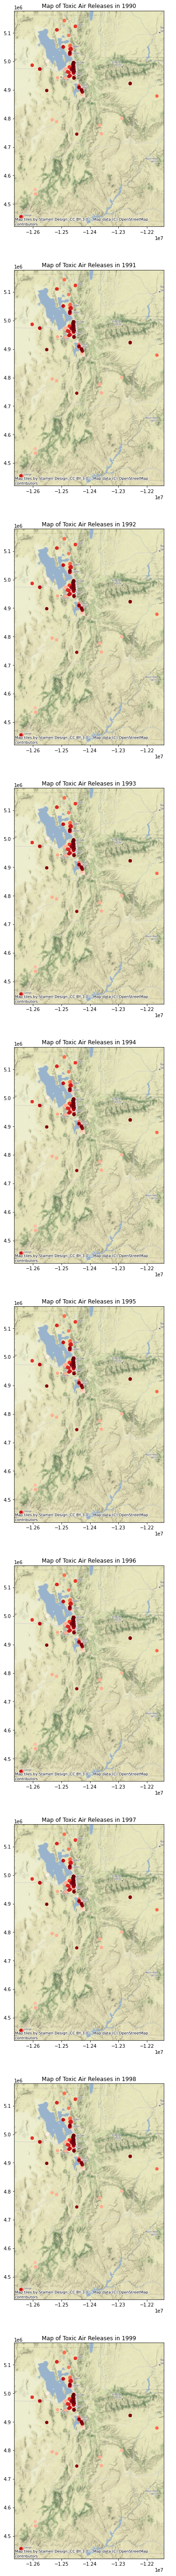

<Figure size 432x288 with 0 Axes>

In [42]:
years = gdf['YEAR'].value_counts().index.sort_values()

fig, ax = plt.subplots(years.shape[0],1,figsize = (100,100)) 

for index,year in enumerate(years): 
    temp_year = gdf[gdf['YEAR']==year]
    gdf.plot(ax = ax[index],cmap = 'Reds')
    ax[index].set_title("Map of Toxic Air Releases in {0}".format(year))
    ctx.add_basemap(ax[index])
    
plt.show()
plt.savefig('TRI_Exp_90_00.png')

In [43]:
#fig.savefig('TRI_Exp_90_00.png')

## 5 Most Common Spills: Fugitive and Stack Air

In [44]:
#This is on the carcinogen data: not the total dataframe. 
#5 most common Fugitive Air Spills
fug_air = carc_sel_tri_air[carc_sel_tri_air['51-FUGITIVEAIR']>0]
fug_air[['CHEMICAL','51-FUGITIVEAIR']]['CHEMICAL'].value_counts().head(5)

SULFURIC ACID (1994 AND AFTER ACID AEROSOLS" ONLY)"    107
BENZENE                                                 81
NICKEL                                                  75
NAPHTHALENE                                             67
ETHYLBENZENE                                            67
Name: CHEMICAL, dtype: int64

In [45]:
#5 most common Stack Air Spills
stack_air = carc_sel_tri_air[carc_sel_tri_air['52-STACKAIR']>0]
stack_air[['CHEMICAL','52-STACKAIR']]['CHEMICAL'].value_counts().head(5)

SULFURIC ACID (1994 AND AFTER ACID AEROSOLS" ONLY)"    109
BENZENE                                                 70
ETHYLBENZENE                                            65
METHYL ISOBUTYL KETONE                                  64
NAPHTHALENE                                             62
Name: CHEMICAL, dtype: int64

# Carcinogen Description Table 

Contains:
1. Agent
2. Cumulative Volume
3. Average (per year volume)
4. Minimum (per year volume)
5. Max
6. Count (observations)
7. Count (distinct facility)

In [46]:
cumulative = carc_sel_tri_air.groupby(['CAS_No']).sum()[['51-FUGITIVEAIR','52-STACKAIR']].reset_index()
cumulative = cumulative[['CAS_No','51-FUGITIVEAIR','52-STACKAIR']].rename(columns = {
    'CAS_No':'CAS_No','51-FUGITIVEAIR':'cum_fug_air','52-STACKAIR':'cum_stack_air'})
average = carc_sel_tri_air.groupby(['CAS_No']).mean()[['51-FUGITIVEAIR','52-STACKAIR']].reset_index()
average = average[['CAS_No','51-FUGITIVEAIR','52-STACKAIR']].rename(columns = {
    'CAS_No':'CAS_No','51-FUGITIVEAIR':'avg_fug_air','52-STACKAIR':'avg_stack_air'})

In [47]:
#Issues
fug_air = carc_sel_tri_air.groupby(['CAS_No','YEAR'])['51-FUGITIVEAIR'].min()
stack_air = carc_sel_tri_air.groupby(['CAS_No','YEAR'])['52-STACKAIR'].min()
min_dict = {}
max_dict = {}
minimum = 0
maximum =0
chem = fug_air.index[0][0]

for chems in fug_air.index:
  
    if chem == chems[0]:
        if minimum > fug_air[chems]:
            minimum = fug_air[chems]
        if maximum < fug_air[chems]:
            maximum = fug_air[chems]
    
    else:
        min_dict.update({chem:minimum})
        max_dict.update({chem:maximum})
        chem = chems[0]
        minimum = fug_air[chems]
        maximum = fug_air[chems]
        
fug_min_df = pd.DataFrame(min_dict,index=['Minimum']).T.reset_index().rename(
    columns = {'index':'CAS_No', 'Minimum':'Fug_Min'})
fug_max_df = pd.DataFrame(max_dict,index=['Maximum']).T.reset_index().rename(
    columns = {'index':'CAS_No', 'Maximum':'Fug_Max'})    

min_dict = {}
max_dict = {}
minimum = 0
maximum =0
chem = stack_air.index[0][0]
for chems in stack_air.index:
    chem
    if chem == chems[0]:
        if minimum > stack_air[chems]:
            minimum = stack_air[chems]
        if maximum < stack_air[chems]:
            maximum = stack_air[chems]
    
    else:
        min_dict.update({chem:minimum})
        max_dict.update({chem:maximum})
        chem = chems[0]
        minimum = stack_air[chems]
        maximum = stack_air[chems]
        
stack_min_df = pd.DataFrame(min_dict,index=['Minimum']).T.reset_index().rename(
    columns = {'index':'CAS_No', 'Minimum':'Stack_Min'})
stack_max_df = pd.DataFrame(max_dict,index=['Maximum']).T.reset_index().rename(
    columns = {'index':'CAS_No', 'Maximum':'Stack_Max'})         

In [48]:
fug_counts = carc_sel_tri_air[carc_sel_tri_air['51-FUGITIVEAIR']>0]['CAS_No'].value_counts()
fug_counts = pd.DataFrame(fug_counts).reset_index().rename(
    columns = {'index':'CAS_No', 'CAS_No':'Fug_Counts'})
stack_counts = carc_sel_tri_air[carc_sel_tri_air['52-STACKAIR']>0]['CAS_No'].value_counts()
stack_counts = pd.DataFrame(stack_counts).reset_index().rename(
    columns = {'index':'CAS_No', 'CAS_No':'Stack_Counts'})

In [49]:
unique_cas = carc_sel_tri_air['CAS_No'].value_counts().index
fug_distinct_cas = {}
stack_distinct_cas = {}

for cas in unique_cas:
    temp_fug = carc_sel_tri_air[(carc_sel_tri_air['CAS_No'] == cas) & (carc_sel_tri_air['51-FUGITIVEAIR'] > 0)]
    temp_stack = carc_sel_tri_air[(carc_sel_tri_air['CAS_No'] == cas) & (carc_sel_tri_air['52-STACKAIR'] > 0)]
    
    fug_distinct_cas.update({cas:temp_fug['FACILITYNAME'].drop_duplicates().shape[0]})
    stack_distinct_cas.update({cas:temp_stack['FACILITYNAME'].drop_duplicates().shape[0]})

fug_distinct_cas = pd.DataFrame(fug_distinct_cas,index=['Distinct']).T.reset_index().rename(
    columns = {'index':'CAS_No', 'Distinct':'Fug_Distinct'}) 
stack_distinct_cas = pd.DataFrame(stack_distinct_cas,index=['Distinct']).T.reset_index().rename(
    columns = {'index':'CAS_No', 'Distinct':'Stack_Distinct'}) 

In [50]:
summary_table = pd.concat([cumulative,average,fug_distinct_cas,stack_distinct_cas,fug_counts,stack_counts,fug_min_df,
          fug_max_df,stack_min_df,stack_max_df],axis =1, join = 'inner')
summary_table.head()

CAS_No  cum_fug_air  cum_stack_air     CAS_No  avg_fug_air  \
0  000050000       4914.0       105507.0  000050000   189.000000   
1  000067663         12.0            5.0  000067663     6.000000   
2  000068122          9.0           34.0  000068122     9.000000   
3  000071432     451579.0       217920.0  000071432  5507.060976   
4  000075092     230022.0      6386908.0  000075092  5476.714286   

   avg_stack_air     CAS_No  Fug_Distinct     CAS_No  Stack_Distinct  ...  \
0    4057.961538  007664939            33  007664939              33  ...   
1       2.500000  007440020            20  007440020               8  ...   
2      34.000000  000100425            12  000100425               8  ...   
3    2657.560976  000071432            12  000071432              12  ...   
4  152069.238095  000100414            12  000100414              13  ...   

      CAS_No  Stack_Counts     CAS_No  Fug_Min     CAS_No  Fug_Max     CAS_No  \
0  007664939           109  000050000      0.0  000050000    250.0  000050000   
1  000071432            70  000067663      5.0  000067663      7.0  000067663   
2  000100414            65  000068122      9.0  000068122      9.0  000068122   
3  000108101            64  000071432      0.0  000071432    750.0  000071432   
4  000091203            62  000075092      0.0  000075092   2772.0  000075092   

   Stack_Min     CAS_No  Stack_Max  
0        0.0  000050000      250.0  
1        0.0  000067663        5.0  
2       34.0  000068122       34.0  
3        0.0  000071432        0.0  
4        0.0  000075092    10000.0  

[5 rows x 22 columns]

In [51]:
summary_table.iloc[:,[0,1,2,4,5,7,9,11,13,15,17,19,21]]

CAS_No  cum_fug_air  cum_stack_air  avg_fug_air  avg_stack_air  \
0   000050000       4914.0       105507.0   189.000000    4057.961538   
1   000067663         12.0            5.0     6.000000       2.500000   
2   000068122          9.0           34.0     9.000000      34.000000   
3   000071432     451579.0       217920.0  5507.060976    2657.560976   
4   000075092     230022.0      6386908.0  5476.714286  152069.238095   
5   000075218      15986.0        74313.0  1598.600000    7431.300000   
6   000079016      65184.0        43297.0  5432.000000    3608.083333   
7   000087865         18.0            0.0     9.000000       0.000000   
8   000091203     110769.0        48900.0  1517.383562     669.863014   
9   000091225        187.0            0.0    31.166667       0.000000   
10  000094757          2.0            0.0     1.000000       0.000000   
11  000098828       1470.0         1715.0    81.666667      95.277778   
12  000100414     102554.0        38168.0  1404.849315     522.849315   
13  000100425     615007.0       319894.0  7321.511905    3808.261905   
14  000101779         23.0           23.0    23.000000      23.000000   
15  000106898         33.0            8.0    16.500000       4.000000   
16  000106934        784.0            0.0   156.800000       0.000000   
17  000106990       1971.0          320.0   103.736842      16.842105   
18  000107062       1908.0            0.0   381.600000       0.000000   
19  000108101      74977.0       847407.0  1153.492308   13037.030769   
20  000111422          6.0            0.0     3.000000       0.000000   
21  000117817          0.0        24752.0     0.000000    1547.000000   
22  000123911      79616.0       156764.0  3618.909091    7125.636364   
23  000127184      53952.0        23564.0  3372.000000    1472.750000   
24  001313275       2291.0         4406.0   208.272727     400.545455   

    Fug_Distinct  Stack_Distinct  Fug_Counts  Stack_Counts  Fug_Min  Fug_Max  \
0             33              33         107           109      0.0    250.0   
1             20               8          81            70      5.0      7.0   
2             12               8          75            65      9.0      9.0   
3             12              12          67            64      0.0    750.0   
4             12              13          67            62      0.0   2772.0   
5             11              12          66            37    179.0   3002.0   
6              9              13          38            36      0.0  10443.0   
7             10               8          34            33      1.0     17.0   
8              7              10          21            29      0.0      8.0   
9              7               6          20            25      9.0     72.0   
10             4               4          19            21      1.0      1.0   
11             3               2          19            18      0.0    600.0   
12             6               6          17            16      0.0      5.0   
13             0               3          15            10      0.0      0.0   
14             7               3          12            10     23.0     23.0   
15             4               2          12            10      5.0     28.0   
16             3               0          11             7      5.0    250.0   
17             3               1          10             6      4.0    240.0   
18             2               1           9             4     58.0   1100.0   
19             2               2           6             4      0.0      0.0   
20             1               2           5             2      2.0      4.0   
21             1               0           5             2      0.0      0.0   
22             1               0           5             1      0.0     44.0   
23             1               0           3             1      0.0  29040.0   
24             2               1           2             1      3.0    291.0   

    Stack_Min  Stack_Max  


## Sanpete and Emery: 

In [52]:
carc_sel_tri_air[carc_sel_tri_air['COUNTY'] == 'SANPETE']

CAS_No    Agent Group       Volume  Year Additional_information  YEAR  \
824  000100425  Styrene    2A  60, 82, 121  2019                    NaN  1999   

               TRIFD                                FACILITYNAME      CITY  \
824  84634VLMNT550NC  APPLIED COMPOSITE TECHNOLOGY MANUFACTURING  GUNNISON   

     ...        INDUSTRYSECTOR CHEMICAL  CAS#/COMPOUNDID  METAL  CARCINOGEN  \
824  ...  Electrical Equipment  STYRENE        000100425     NO         YES   

     UNITOFMEASURE 51-FUGITIVEAIR 52-STACKAIR TOTALRELEASES  \
824         Pounds         5700.0         0.0        5700.0   

                        geometry  
824  POINT (-111.80565 39.16310)  

[1 rows x 26 columns]

In [53]:
carc_sel_tri_air[carc_sel_tri_air['COUNTY'] == 'EMERY']

CAS_No                                              Agent Group  \
247  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
249  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
258  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   
261  007664939  Strong-inorganic-acid mists containing sulfuri...   NaN   

    Volume Year Additional_information  YEAR            TRIFD  \
247    NaN  NaN                    NaN  1998  84528PCFCR10MIL   
249    NaN  NaN                    NaN  1998  84513PCFCR3MILE   
258    NaN  NaN                    NaN  1999  84528PCFCR10MIL   
261    NaN  NaN                    NaN  1999  84513PCFCR3MILE   

                           FACILITYNAME         CITY  ...      INDUSTRYSECTOR  \
247  PACIFICORP ENERGY-HUNTINGTON PLANT   HUNTINGTON  ...  Electric Utilities   
249             PACIFICORP HUNTER PLANT  CASTLE DALE  ...  Electric Utilities   
258  PACIFICORP ENERGY-HUNTINGTON PLANT   HUNTINGTON  ...  Electric Utilities   
261             PACIFICORP HUNTER PLANT  CASTLE DALE  ...  Electric Utilities   

                                              CHEMICAL  CAS#/COMPOUNDID  \
247  SULFURIC ACID (1994 AND AFTER ACID AEROSOLS" O...        007664939   
249  SULFURIC ACID (1994 AND AFTER ACID AEROSOLS" O...        007664939   
258  SULFURIC ACID (1994 AND AFTER ACID AEROSOLS" O...        007664939   
261  SULFURIC ACID (1994 AND AFTER ACID AEROSOLS" O...        007664939   

     METAL  CARCINOGEN  UNITOFMEASURE 51-FUGITIVEAIR 52-STACKAIR  \
247     NO          NO         Pounds            0.0     38000.0   
249     NO          NO         Pounds            0.0    130000.0   
258     NO          NO         Pounds            0.0     38000.0   
261     NO          NO         Pounds            0.0     56000.0   

    TOTALRELEASES                     geometry  
247       38000.0  POINT (-111.07939 39.38149)  
249      130000.0  POINT (-111.02939 39.17314)  
258       38000.0  POINT (-111.07939 39.38149)  
261       56000.0  POINT (-111.02939 39.17314)  

[4 rows x 26 columns]

# Wasatch Zoom In:

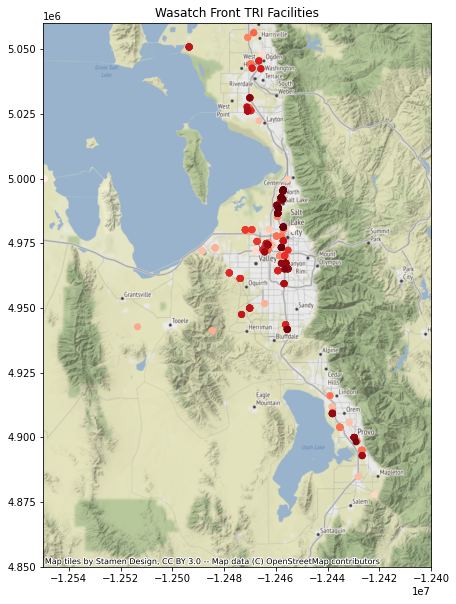

In [54]:
gdf = gpd.GeoDataFrame(
    carc_sel_tri_air, geometry=gpd.points_from_xy(carc_sel_tri_air.LONGITUDE, carc_sel_tri_air.LATITUDE))
gdf.crs = {'init' :'epsg:4326'}
gdf = gdf.to_crs({'init': 'epsg:3857'})

fig, ax = plt.subplots(figsize = (10,10)) 
gdf.plot(ax = ax,cmap = 'Reds')
plt.title("Wasatch Front TRI Facilities")

#Crop for the AoI
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(-1.255e7, -1.24e7)
ax.set_ylim(4850000, 5060000)

ctx.add_basemap(ax)

plt.show()

Block Group Estimates from 2000: https://gis.utah.gov/data/demographic/census/#2000Census
<br>Accessed on 03.22.20

In [55]:
pop_2000 =fiona.open('CensusBlockGroups2000.gdb')
pop_2000.driver # OpenFileGDB
pop_2000.schema # {'geometry': '3D MultiLineString', 'properties': OrderedDict([(u'FCSubtype', 'int'), ...
pop_2000.crs # {'init': u'epsg:4326'}

# Build the GeoDataFrame from Fiona Collection
pop_2000_gdf = gpd.GeoDataFrame.from_features([feature for feature in pop_2000], crs=pop_2000.crs)
# Get the order of the fields in the Fiona Collection; add geometry to the end
columns = list(pop_2000.meta["schema"]["properties"]) + ["geometry"]
# Re-order columns in the correct order
pop_2000_gdf = pop_2000_gdf[columns]

DriverError: CensusBlockGroups2000.gdb: No such file or directory

In [ ]:
pop_2000_gdf.columns

In [ ]:
pop_2000_gdf = pop_2000_gdf.to_crs({'init': 'epsg:3857'})
fig, ax = plt.subplots(1,1,figsize = (10,10))
pop_2000_gdf.plot(ax = ax,column='TAPERSONS',alpha =0.8)
gdf.plot(ax = ax,cmap = 'Reds', alpha = 5)
plt.title("TRI Facilities on 2000 Block Group Estimates")


In [ ]:
test = pop_2000_gdf[pop_2000_gdf['COUNTY'].isin(['011','035','045','049','057','043','051','029'])]

In [ ]:
pop_2000_gdf = pop_2000_gdf.to_crs({'init': 'epsg:3857'})
fig, ax = plt.subplots(1,1,figsize = (20,20))
#Crop for the AoI
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(-1.248e7, -1.242e7)
ax.set_ylim(4890000, 5050000)

test.plot(ax = ax,
                  column='TAPERSONS',
                  cmap = 'Oranges',
                  alpha =0.6,
                  legend=True,
                  legend_kwds={'label': "Population by Block Group", 'orientation': "vertical"})

gdf.plot(ax = ax,color = 'k',markersize = 40,marker='^',legend=True,legend_kwds = {'lable':'TRI Site'})
plt.title("TRI Facilities on 2000 Block Group Estimates")
plt.axis('off')
plt.rcParams.update({'font.size': 20})

plt.rcParams["legend.loc"] = 'lower left' 
plt.legend(['TRI Sites'])

ctx.add_basemap(ax)

plt.savefig("TRI_Fac_2000BG.png", bbox_inches='tight')
plt.show()

## Updates: 04.20.20 

Chats with Kevin Perry isolated a need for: 

1. Comparison of how many TRI incidents have values for fugitive vs stack air release
2. Point Exposure vs production exposure
3. The total incidences per year

In [56]:
select_tri.columns

Index(['YEAR', 'TRIFD', 'FRSID', 'FACILITYNAME', 'STREETADDRESS', 'CITY',
       'COUNTY', 'ST', 'ZIP', 'BIA',
       ...
       '83-ENERGYRECOVEROF', '84-RECYCLINGONSITE', '85-RECYCLINGOFFSIT',
       '86-TREATMENTONSITE', '87-TREATMENTOFFSITE', 'PRODUCTIONWSTE(81-87)',
       '88-ONE-TIMERELEASE', '89-PRODUCTIONRATIO', 'PARENTCONAME',
       'PARENTCODBNUM'],
      dtype='object', length=107)

In [57]:
tri_comp = select_tri[['YEAR','TRIFD','FRSID','FACILITYNAME','CITY','COUNTY','ST','ZIP','LATITUDE','LONGITUDE',
            'INDUSTRYSECTORCODE','INDUSTRYSECTOR','CHEMICAL','CAS#/COMPOUNDID','METAL','CARCINOGEN' ,
            'UNITOFMEASURE','51-FUGITIVEAIR','52-STACKAIR','PRIMARYSIC','INDUSTRYSECTORCODE'
                       ,'88-ONE-TIMERELEASE','PRODUCTIONWSTE(81-87)']]


#Grab those which have non-zeros in fugitive or stack air
tri_comp = tri_comp[(tri_comp['51-FUGITIVEAIR']>0) | (tri_comp['52-STACKAIR']>0)]

#Get carcinogens: 
tri_comp = known_carc.drop(columns=['Year','Volume','Additional_information']).merge(tri_comp, left_on='CAS_No', right_on='CAS#/COMPOUNDID',how='inner')

#Describe the dates
print('The range of years is {0} to {1}'.format(tri_comp['YEAR'].min(),tri_comp['YEAR'].max()))
print('The total number of entries is: {0}'.format(tri_comp.shape[0]))

The range of years is 1990 to 1999
The total number of entries is: 900


Text(0.5, 1.0, 'TRI Missing Values')

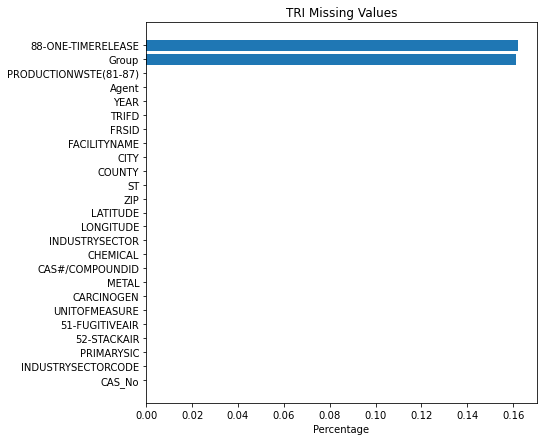

In [58]:
#Visualize the distribution again
#Let's take a look at the percentage of missing values
tri_na = tri_comp.isna().sum().sort_values()/tri_comp.shape[0]

#Plotting
plt.rcParams.update({'font.size': 10})
f,ax = plt.subplots(1,1,figsize=(7,7))
ax.barh(tri_na.index,tri_na)
ax.set_xlabel('Percentage')
ax.set_title('TRI Missing Values')

In [59]:
val = tri_comp[tri_comp['51-FUGITIVEAIR']>0].shape[0]/tri_comp.shape[0]
val2 = tri_comp[tri_comp['52-STACKAIR']>0].shape[0]/tri_comp.shape[0]
val3 = tri_comp[(tri_comp['51-FUGITIVEAIR']>0) & (tri_comp['52-STACKAIR']>0)].shape[0]/tri_comp.shape[0]

print('Percentage of TRI Releases which have only Fugitive Release: {0}'.format(val-val3))
print('Percentage of TRI Releases which have only Stack Release: {0}'.format(val2-val3))
print('Percentage of TRI Releases with both Fugitive and Stack: {0}'.format(val3))

Percentage of TRI Releases which have only Fugitive Release: 0.28555555555555556
Percentage of TRI Releases which have only Stack Release: 0.18222222222222217
Percentage of TRI Releases with both Fugitive and Stack: 0.5322222222222223


In [60]:
val4 = tri_comp[tri_comp['88-ONE-TIMERELEASE']>0].shape[0]/tri_comp.shape[0]

print('Percentage of TRI Releases which contain a one time release: {0}'.format(val4))
print('Approximately 20% of the TRI values are missing this label though and remain unknown')

Percentage of TRI Releases which contain a one time release: 0.07555555555555556
Approximately 20% of the TRI values are missing this label though and remain unknown


In [61]:
#Number of releases per year
tri_comp['YEAR'].value_counts().sort_index()

1990     91
1991     88
1992     95
1993    100
1994    106
1995     77
1996     77
1997     68
1998    101
1999     97
Name: YEAR, dtype: int64

In [62]:
#Information for Joemy 
tri_comp['INDUSTRYSECTOR'].drop_duplicates().to_csv('Industry_Sectors.csv')
tri_comp['PRIMARYSIC'].drop_duplicates().to_csv('Primary_SIC.csv')
tri_comp.to_csv('TRI_Carc_FSRel_9099.csv')